# AI and ML 12211810 潘炜 homework 02

import necessary library

In [21]:
import numpy as np
import matplotlib.pyplot as plt

class specification

In [22]:
class LinearRegresssion:
    def __init__(self, n_feature = 1, learning_rate=0.0001, batch_size=10,epoches=10000):
        self.epoches = epoches
        self.learning_rate = learning_rate
        self.tole = 1e-5
        self.batch_size = batch_size
        self.W = np.random.randn(n_feature + 1) * 0.05

    # stochastic gradient descent
    def _SGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        seed = np.random.randint(0, len(input))
        grad = self._gradient(groundtruth[seed], pred[seed], input[seed,:][np.newaxis, :]) # to ensure the shape is (,2) instead of (2,)
        self.W = self.W - self.learning_rate * grad

    # batch gradient descent
    def _BGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        grad = self._gradient(groundtruth, pred, input)
        self.W = self.W - self.learning_rate * grad

    # 10 percent of mini batch graident descent 
    def _MBGD_update(self, input, groundtruth):
        pred = input.dot(self.W)
        indices = np.random.choice(groundtruth.shape[0], self.batch_size, replace=False)
        grad = self._gradient(groundtruth[indices], pred[indices], input[indices])
        self.W = self.W - self.learning_rate * grad
    
    def _mse_loss(self, groundtruth, predict):
        return np.mean((groundtruth - predict) ** 2)
    
    def _gradient(self, groudtruth, predict, input):
        return 1 / input.shape[0] * np.mean(2 * (predict - groudtruth ) * input[:,:-1])

    def fit(self, X, y):
        X = np.c_[X, np.ones(len(X))]
        for i in range(self.epoches):
            # loss = self._SGD_update(X, y)
            # loss = self._BGD_update(X, y)
            self._MBGD_update(X, y)
            if i % 100 == 0:
                loss = self._mse_loss(y, X.dot(self.W))
                print(f"for {i} iteration, the loss is {loss}")
        return self.W

data generation

In [23]:
X_train = np.arange(100).reshape(100,1)
a, b = 1, 10
y_train = a * X_train + b + np.random.normal(0, 5, size=X_train.shape)
y_train = y_train.reshape(-1)

training 

for 0 iteration, the loss is 4377.69212931866
for 100 iteration, the loss is 54.411718892798426
for 200 iteration, the loss is 56.27661229158659
for 300 iteration, the loss is 54.19031021512123
for 400 iteration, the loss is 55.964254928892714
for 500 iteration, the loss is 60.72838133955059
for 600 iteration, the loss is 54.317774575280566
for 700 iteration, the loss is 53.799543065484066
for 800 iteration, the loss is 51.31250644705435
for 900 iteration, the loss is 54.49805929680818
for 1000 iteration, the loss is 52.057597003164645
for 1100 iteration, the loss is 52.77245221360883
for 1200 iteration, the loss is 53.93898598729651
for 1300 iteration, the loss is 53.493456022203006
for 1400 iteration, the loss is 55.21862128032403
for 1500 iteration, the loss is 54.61500164467671
for 1600 iteration, the loss is 56.421384322417005
for 1700 iteration, the loss is 53.48473277965744
for 1800 iteration, the loss is 52.999503420213685
for 1900 iteration, the loss is 52.87128929800317
for 2

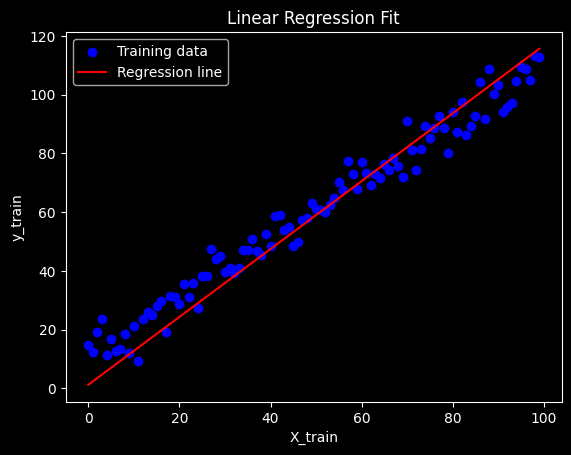

In [24]:
model = LinearRegresssion(n_feature=X_train.shape[1])
w = model.fit(X_train, y_train)
plt.scatter(X_train[:, 0], y_train, color='blue', label='Training data')

x_values = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 100)
y_values = w[0] + w[1] * x_values
plt.plot(x_values, y_values, color='red', label='Regression line')

plt.xlabel('X_train')
plt.ylabel('y_train')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()